In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import functools
import math
import neurons


In [2]:
def calculate_euclidian_distance(vector1, vector2):
    '''
    Finds the euclidian distance between the features of a training item and the wieghts of a passed neuron.
    '''
    # find the difference squared between the vertecies of the training item and the neuron weights
    differences = [(feature - vector2[index])**2 for index, feature in enumerate(vector1)]
    
    # find the sum of the computed differences
    sum =  functools.reduce(lambda x,y : x + y, differences)
    
    square_root = math.sqrt(sum)
    return square_root
    
calculate_euclidian_distance([.1,.2,.3], neurons.StepActivationNeuron([.2, .3, .4], 1).weights )

0.17320508075688776

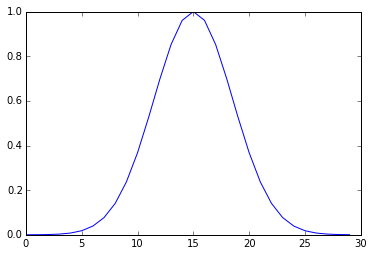

1.0

In [3]:
def calculate_neighborhood_function(input_vector, center_vector, neighborhood_width, iteration):
    '''
    Calculates the neighborhood training coeficient with a gausian function.
    '''
    euclidian_norm = calculate_euclidian_distance(input_vector, center_vector)
    return math.exp(-((euclidian_norm**2) / (2 * iteration * (neighborhood_width**2))))
    
inputs = [x for x in range(30)]
line = plt.plot(inputs, [calculate_neighborhood_function([x, x], [15, 15], 5, 1) for x in range(30)]);
plt.show();
calculate_neighborhood_function((0, 0), (0, 0), 5, 1)

[ 0.08437556  0.14440005  0.07979767]
[ 0.20464845  0.10595843  0.41929455]
[ 0.11346701  0.36580812  0.04894496]
[ 0.13231329  0.1290042   0.54848957]

[ 0.7288392   0.15770501  0.55965869]
[ 0.20307451  0.39728497  0.22678633]
[ 0.6583482   0.37420243  0.06595484]
[ 0.43557902  0.91686876  0.23164076]


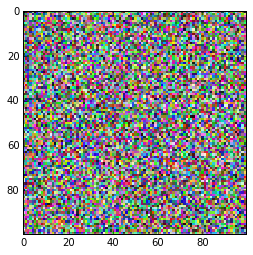

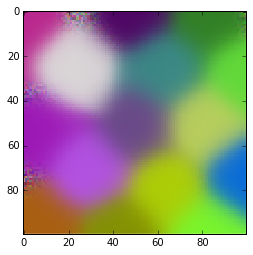

In [7]:
# variables
matrix_width = 100
iterations = 100
neighborhood_width = 1
number_of_training_items = 15

output_neurons = [[neurons.StepActivationNeuron(numpy.random.random(3), 1) for y in range(matrix_width)] for z in range(matrix_width)]
output_weights = [[neuron.weights for neuron in row] for row in output_neurons]

#print neuron weights from the corner of the map before training
print(output_neurons[0][0].weights)
print(output_neurons[0][matrix_width - 1].weights)
print(output_neurons[matrix_width - 1][0].weights)
print(output_neurons[matrix_width - 1][matrix_width - 1].weights)

plt.imshow(output_weights, interpolation = "none")


# create a random set of 15 training RGB values.
training_set = [ x for x in numpy.random.random((number_of_training_items,3))]

best_matching_units = []
# print(training_set)

# Create a 50x50 array of neurons with 3 random weights each.
#output_neurons = [[neurons.StepActivationNeuron(numpy.random.random(3), 1) for y in range(matrix_width)] for z in range(matrix_width)]
#output_weights = [[neuron.weights for neuron in row] for row in output_neurons]

# for row in output_neurons:
#         for neuron in row: 
#             print(neuron.weights)

print()

for iteration in range(1, iterations):
    
    #decay is a monotonicly decreasing ratio of the number of iterations
    decay_ratio = 1-((iteration - 1) / iterations)
    
    for training_item in training_set:
        distances = [[calculate_euclidian_distance(training_item, neuron.weights) for neuron in row] for row in output_neurons]
        # the neuron with the smallest distance from the training example
        best_matching_index = numpy.argmin(distances);
        best_matching_index_tuple = numpy.unravel_index(best_matching_index, (matrix_width, matrix_width));
        best_matching_neuron = output_neurons[best_matching_index_tuple[0]][best_matching_index_tuple[1]]
        
#         print()
#         print(best_matching_index, training_item, best_matching_index_tuple)
        
        for row_index, row in enumerate(output_neurons):
            for column_index, neuron in enumerate(row): 
                neuron_index_tuple = (row_index, column_index)
                vector_difference = numpy.matrix(training_item) - numpy.matrix(neuron.weights)
                neighborhood_fuction_value = calculate_neighborhood_function(neuron_index_tuple, best_matching_index_tuple, neighborhood_width, iteration)
                neighborhood_ratio = vector_difference * neighborhood_fuction_value * decay_ratio
                ratio_sum = numpy.matrix(neuron.weights) + neighborhood_ratio
                
                neuron.weights = ratio_sum.getA1()
#                 print("vector_difference:           {0}".format(vector_difference))
#                 print("neighborhood_fuction_value:  {0}".format(neighborhood_fuction_value))
#                 print("neighborhood_ratio:          {0}".format(neighborhood_ratio))
#                 print("neuron.weights:              {0}".format(neuron.weights))
        
    

# plot the weights as rgb colors.
output_weights = [[neuron.weights for neuron in row] for row in output_neurons]

#print neuron weights from the corner of the map after training
print(output_neurons[0][0].weights)
print(output_neurons[0][matrix_width - 1].weights)
print(output_neurons[matrix_width - 1][0].weights)
print(output_neurons[matrix_width - 1][matrix_width - 1].weights)

plt.figure()
plt.imshow(output_weights, interpolation = "none")
